In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve


# 定义方程组
def fun(x):
    u, v = x
    return np.array([u * np.log(u) + v * np.log(v) + 0.3, u**4 + v**2 - 1])


# 定义雅可比矩阵
def J(x):
    u, v = x
    return np.array([[np.log(u) + 1, np.log(v) + 1], [4 * u**3, 2 * v]])


# 牛顿法求解方程组
def newton(
    f, jac, x1, n=40, ftol=1000 * np.finfo(float).eps, xtol=1000 * np.finfo(float).eps
):
    x = [np.array(x1, dtype=float)]
    y = f(x[0])
    J = jac(x[0])
    delta_x = np.inf * np.ones_like(x[0])
    k = 1
    while (np.linalg.norm(delta_x) > xtol) and (np.linalg.norm(y) > ftol):
        delta_x = -solve(J, y)
        x.append(x[k - 1] + delta_x)
        k += 1
        y = f(x[k - 1])
        J = jac(x[k - 1])
        if k == n:
            break
    return x


# 初始猜测值
x = [1, 0.1]
x1 = [0.1, 1]
# 调用牛顿法
x0 = newton(fun, J, x)[-1]
x2 = newton(fun, J, x1)[-1]
# 打印结果
print(f"第 {1} 次: {x0}")
print(f"第 {2} 次: {x2}")


第 1 次: [0.9935067  0.16037863]
第 2 次: [0.16790519 0.99960252]


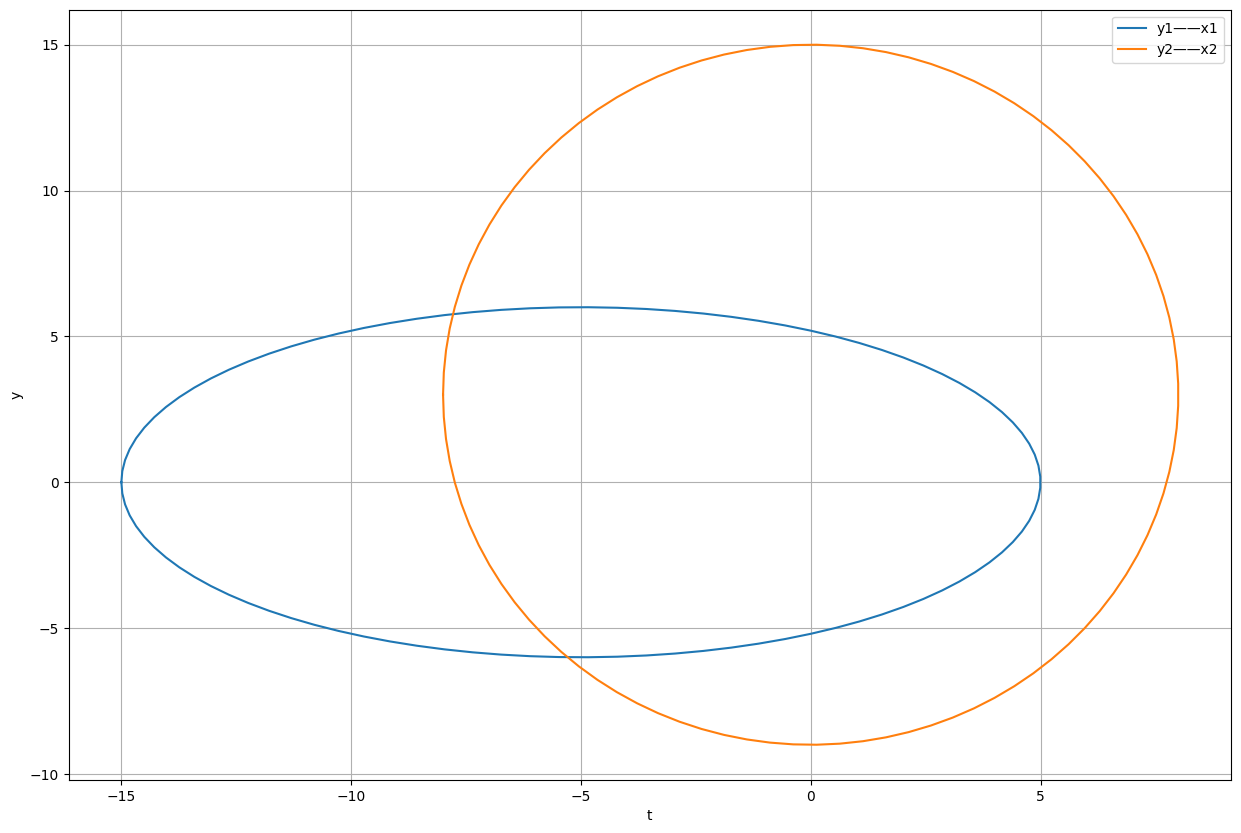

-7.785115609852422 5.762597259423245
-5.2934553300475855 -5.997415962640577


In [18]:
import numpy as np
from scipy.linalg import solve


def x1(t):
    return -5 + 10 * np.cos(t)


def y1(t):
    return 6 * np.sin(t)


def x2(t):
    return 8 * np.cos(t)


def y2(t):
    return 3 + 12 * np.sin(t)


t = np.linspace(-np.pi, np.pi, 100)
x_1 = x1(t)
y_1 = y1(t)
x_2 = x2(t)
y_2 = y2(t)
plt.figure(figsize=(15, 10))
plt.plot(x_1, y_1, label="y1——x1")
plt.plot(x_2, y_2, label="y2——x2")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


def fun(t):
    t1, t2 = t
    return np.array(
        [-5 + 10 * np.cos(t1) - 8 * np.cos(t2), 6 * np.sin(t1) - (3 + 12 * np.sin(t2))]
    )


def J(t):
    t1, t2 = t
    return np.array(
        [[-10 * np.sin(t1), 8 * np.sin(t2)], [6 * np.cos(t1), -12 * np.cos(t2)]]
    )


# 牛顿法求解方程组
def newton(
    f, jac, x1, n=40, ftol=1000 * np.finfo(float).eps, xtol=1000 * np.finfo(float).eps
):
    x = [np.array(x1, dtype=float)]
    y = f(x[0])
    J = jac(x[0])
    delta_x = np.inf * np.ones_like(x[0])
    k = 1
    while (np.linalg.norm(delta_x) > xtol) and (np.linalg.norm(y) > ftol):
        delta_x = -solve(J, y)
        x.append(x[k - 1] + delta_x)
        k += 1
        y = f(x[k - 1])
        J = jac(x[k - 1])
        if k == n:
            break
    return x


# 初始猜测值
x = [-6.5, 7]
x_1 = [-6, 6]
# 调用牛顿法
x0 = newton(fun, J, x)[-1]
x_2 = newton(fun, J, x_1)[-1]
# 打印结果
print(x1(x0[0]), y1(x0[0]))
print(x1(x_2[0]), y1(x_2[0]))


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve


def fun(x0):
    x, y, z, r = x0
    return np.array(
        [
            x - 5 - r * x / 25,
            y - 4 - r * y / 16,
            z - 3 - r * z / 9,
            1 / 25 * x**2 + 1 / 16 * y**2 + 1 / 9 * z**2 - 1,
        ]
    )


def J(x0):
    x, y, z, r = x0
    return np.array(
        [
            [1 - r / 25, 0, 0, -x / 25],
            [0, 1 - r / 16, 0, -y / 16],
            [0, 0, 1 - r / 9, -2 / 9],
            [-2 * x / 25, -y / 8, -2 * z / 9, 0],
        ]
    )


def newton(
    f, j, x, n=40, ftol=1000 * np.finfo(float).eps, xtol=1000 * np.finfo(float).eps
):
    x = [np.array(x, dtype=float)]
    y = f(x[0])
    jx = j(x[0])
    delta_x = np.inf * np.ones_like(x[0])
    k = 1

    while np.linalg.norm(delta_x) > xtol and np.linalg.norm(y) > ftol:
        delta_x = -solve(jx, y)
        x.append(x[k - 1] + delta_x)
        k += 1
        y = f(x[k - 1])
        jx = j(x[k - 1])
        if k == n:
            break
        return x


def distance(x):
    x, y, z, _ = x
    return (x - 5) ** 2 + (y - 4) ** 2 + (z - 3) ** 2


x1 = [2, 2, 1, 1]
x2 = [3, 2, 1, 3]
x_1 = newton(fun, J, x1)
x_2 = newton(fun, J, x2)
distance_1 = distance(x_1[-1])
distance_2 = distance(x_2[-1])
for i, xi in enumerate(x_1):
    print(f"第 {i} 次: {xi}")
for i, xi in enumerate(x_2):
    print(f"第 {i} 次: {xi}")
if distance_1 > distance_2:
    print(f"最近点为:{x_1[-1][:3]},最远点为:{x_2[-1][0:3]}")
else:
    print(f"最近点为:{x_2[-1][:3]},最远点为:{x_1[-1][0:3]}")


第 0 次: [2. 2. 1. 1.]
第 1 次: [  3.50724638   1.54492754  -1.72826087 -19.41304348]
第 0 次: [3. 2. 1. 3.]
第 1 次: [  3.39968085   2.34835788  -1.07855793 -13.73567379]
最近点为:[ 3.50724638  1.54492754 -1.72826087],最远点为:[ 3.39968085  2.34835788 -1.07855793]


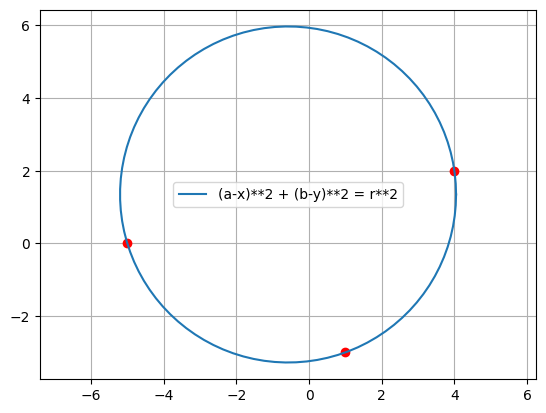

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve


def fun(canshu):
    a, b, r = canshu
    return np.array(
        [
            (a + 5) ** 2 + (b - 0) ** 2 - r**2,
            (a - 1) ** 2 + (b + 3) ** 2 - r**2,
            (a - 4) ** 2 + (b - 2) ** 2 - r**2,
        ]
    )


# 雅可比函数
def J(canshu):
    a, b, r = canshu
    return np.array(
        [
            [2 * (a + 5), 2 * (b - 0), -2 * r],
            [2 * (a - 1), 2 * (b + 3), -2 * r],
            [2 * (a - 4), 2 * (b - 2), -2 * r],
        ]
    )


# 牛顿迭代
def newton(f, j, x0, n=40, ftol=np.finfo(float).eps, xtol=np.finfo(float).eps):
    x = np.array(x0, dtype=float)
    y = f(x)
    jx = j(x)
    delta_x = np.inf * np.ones_like(x)
    k = 1
    while np.linalg.norm(delta_x) > xtol and np.linalg.norm(y) > ftol:
        delta_x = -solve(jx, y)
        x = x + delta_x
        k += 1
        y = f(x)
        jx = j(x)
        if k == n:
            break
    return x


canshu = [1, 1, 1]
x = newton(fun, J, canshu)
a, b, r = x
# 绘图
theta = np.linspace(0, 2 * np.pi, 100)
x0 = a + r * np.cos(theta)
y0 = b + r * np.sin(theta)
plt.plot(-5, 0, "ro")
plt.plot(1, -3, "ro")
plt.plot(4, 2, "ro")
plt.plot(x0, y0, label="(a-x)**2 + (b-y)**2 = r**2")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


In [21]:
import matplotlib.pyplot as plt
import numpy as np


def fun(x):
    u, v = x
    return np.array([u * np.log(u) + v * np.log(v) + 0.3, u**4 + v**2 - 1])


# 定义雅可比差分矩阵
def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break

    return x


x0 = [1, 0.1]
x0_real = levenberg(fun, x0)
print("u=1,v=0.1")
for i in x0_real:
    print(i)
x1 = [0.1, 1]
x1_real = levenberg(fun, x1)
print("u=0.1,v=1")
for i in x1_real:
    print(i)


u=1,v=0.1
[1.  0.1]
[0.99607328 0.10740161]
[0.994473   0.13443641]
[0.9940924  0.15470881]
[0.99358407 0.15988919]
[0.99350851 0.16037079]
[0.99350671 0.16037865]
[0.9935067  0.16037863]
[0.9935067  0.16037863]
[0.9935067  0.16037863]
u=0.1,v=1
[0.1 1. ]
[0.10732045 0.99596903]
[0.13425207 0.99491446]
[0.15866724 0.99909851]
[0.16670816 0.99961262]
[0.16786156 0.99960349]
[0.16790498 0.99960253]
[0.16790519 0.99960252]
[0.16790519 0.99960252]


In [22]:
import matplotlib.pyplot as plt
import numpy as np


def x1(t):
    return -5 + 10 * np.cos(t)


def y1(t):
    return 6 * np.sin(t)


def x2(t):
    return 8 * np.cos(t)


def y2(t):
    return 1 + 12 * np.sin(t)


def fun(x):
    t1, t2 = x
    return np.array(
        [-5 + 10 * np.cos(t1) - 8 * np.cos(t2), 6 * np.sin(t1) - 1 - 12 * np.sin(t2)]
    )


# 定义雅可比差分矩阵
def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break

    return x


x0 = [-6, 8]
x_4 = [-6, -5]
x0_real = levenberg(fun, x0)[-1]
x1_real = levenberg(fun, x_4)[-1]
print(x1(x0_real[0]), y1(x0_real[0]))
print(x1(x1_real[0]), y1(x1_real[0]))


-7.321579694910707 5.836068572186605
4.985943301079175 -0.31802059610582856


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve


def fun(x0):
    x, y, z, r = x0
    return np.array(
        [
            x - 5 - r * x / 25,
            y - 4 - r * y / 16,
            z - 3 - r * z / 9,
            1 / 25 * x**2 + 1 / 16 * y**2 + 1 / 9 * z**2 - 1,
        ]
    )


# 定义雅可比差分矩阵
def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break
    return x


x0 = [1, 1, 1, 1]
x0_real = levenberg(fun, x0)[-1]
print(x0_real)
x1 = [0.3, 4, 1, -575]
x1_real = levenberg(fun, x1)[-1]
print(x1_real)


[  3.42413358   2.32680016   1.31671443 -11.50558519]
[  1.27160941   0.7149429    0.32643294 -72.47159111]


C:\Users\leikun\AppData\Local\Temp\ipykernel_33836\685406607.py:8: RuntimeWarning: overflow encountered in square
  return A * 1/(np.cosh(B * (t - C))**2)


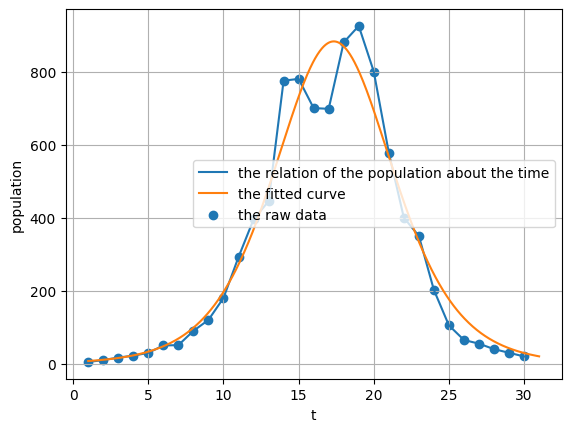

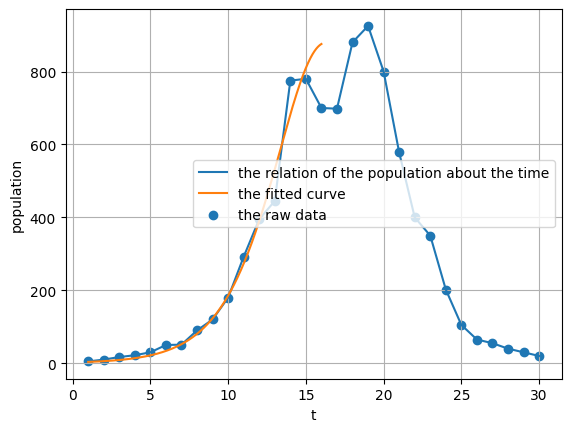

In [3]:
import matplotlib.pyplot as plt
import numpy as np

population = np.array(
    [
        5,
        10,
        17,
        22,
        30,
        50,
        51,
        90,
        120,
        180,
        292,
        395,
        445,
        775,
        780,
        700,
        698,
        880,
        925,
        800,
        578,
        400,
        350,
        202,
        105,
        65,
        55,
        40,
        30,
        20,
    ]
)
x = np.arange(1, len(population) + 1)


def fun(t, a):
    A, B, C = a
    return A * 1 / (np.cosh(B * (t - C)) ** 2)


def misfit(x1):
    return fun(x, x1) - population


# 定义雅可比差分矩阵
def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break
    return x[-1]


guess = [max(population), 1, max(x)]
t0_real = levenberg(misfit, guess)
x1 = np.linspace(1, len(population) + 1, 1000)
y0 = fun(x1, t0_real)
# 绘图
plt.plot(x, population, label="the relation of the population about the time")
plt.plot(x1, y0, label="the fitted curve")
plt.scatter(x, population, label="the raw data")
plt.xlabel("t")
plt.ylabel("population")
plt.grid(True)
plt.legend()
plt.show()
# b部分
x_15 = np.arange(1, 16)


def misfit1(x1):
    return fun(x_15, x1) - population[:15]


guess1 = [max(population[:15]), 1, max(x[:15])]
t1_real = levenberg(misfit1, guess1)
x2 = np.linspace(1, 16, 1000)
y2 = fun(x2, t1_real)
plt.plot(x, population, label="the relation of the population about the time")
plt.plot(x2, y2, label="the fitted curve")
plt.scatter(x, population, label="the raw data")
plt.xlabel("t")
plt.ylabel("population")
plt.grid(True)
plt.legend()
plt.show()


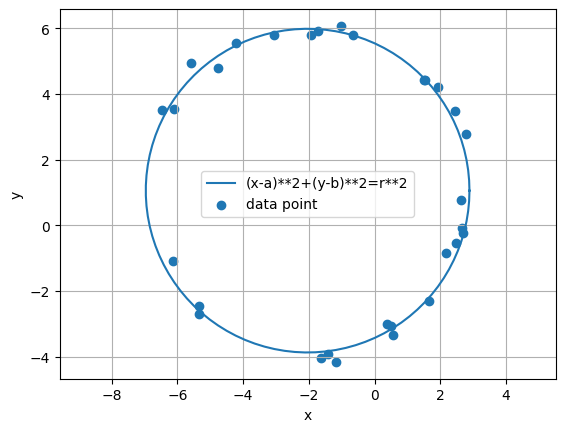

In [25]:
m = 30
t = 2 * np.pi * np.random.rand(m)
x = -2 + 5 * np.cos(t)
y = 1 + 5 * np.sin(t)
# 添加随机噪声
x += 0.2 * np.random.randn(m)
y += 0.2 * np.random.randn(m)


def fun(q):
    a, b, r = q
    return (a - x) ** 2 + (b - y) ** 2 - r**2


def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break
    return x[-1]


guess = [
    x.mean(),
    y.mean(),
    (((x - x.mean()) ** 2 + (y - y.mean()) ** 2) ** 0.5).mean(),
]
canshu = levenberg(fun, guess)
a, b, r = canshu
theta = np.linspace(0, 2 * np.pi, 100)
x1 = a + r * np.cos(theta)
y1 = b + r * np.sin(theta)
plt.plot(x1, y1, label="(x-a)**2+(y-b)**2=r**2")
plt.scatter(x, y, label="data point")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


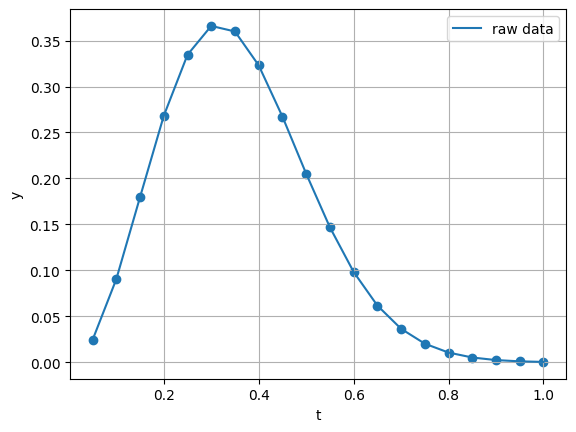

[10. 10.  2.]


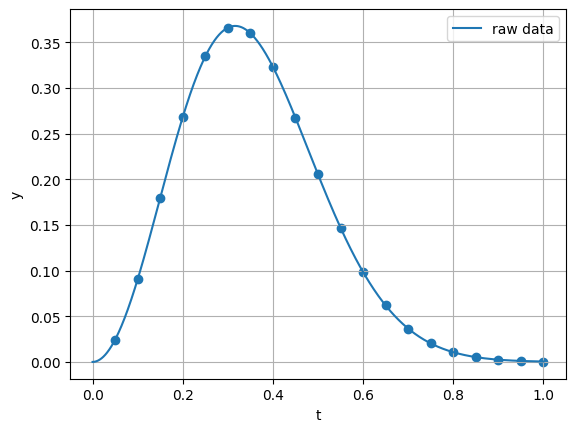

In [26]:
import matplotlib.pyplot as plt
import numpy as np

N = 20
t = (np.arange(1, N + 1)) / N
a = np.array([10, 10, 2])
y = a[0] * t**2 * np.exp(-a[1] * t ** a[2])
ym = y.copy()
ir = np.arange(1, N)
noise = 0.03
ym[ir] += noise * np.random.rand(N - 1)
# 绘图
plt.plot(t, y, label="raw data")
plt.xlabel("t")
plt.ylabel("y")
plt.scatter(t, y)
plt.grid(True)
plt.legend()
plt.show()


def fun(a, t):
    a1, a2, a3 = a
    return a1 * t**2 * np.exp(-a2 * t**a3)


def misfit(a):
    a1, a2, a3 = a
    return a1 * t**2 * np.exp(-a2 * t**a3) - y


def fdjac(f, x, y):
    n = len(x)  # 输入向量的维度
    eps = 1e-8  # 扰动值
    J = np.zeros((len(y), n))  # 初始化雅可比矩阵
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = eps
        J[:, i] = (f(x + dx) - y) / eps  # 计算第 i 列的偏导数
    return J


# 定义Levenverg 函数
def levenberg(f, x1, maxiter=40, ftol=1e-12, xtol=1e-12):
    x = [np.array(x1, dtype=float)]
    yk = np.array(f(x1))
    k = 1
    s = np.inf
    A = fdjac(f, x[-1], yk)  # 初始化牛顿步长
    jac_is_new = True
    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(yk) > ftol):
        # 计算步长
        B = A.T @ A + lam * np.eye(len(x1))
        z = A.T @ yk
        s = -np.linalg.solve(B, z)
        x_hat = x[-1] + s
        y_hat = np.array(f(x_hat))
        # 判断是否接受新步长
        if np.linalg.norm(y_hat) < np.linalg.norm(yk):  # Accept
            lam /= 10
            A += (y_hat - yk - A @ s)[:, None] * (s / (s @ s))[:, None].T
            jac_is_new = False
            x.append(x_hat)
            yk = y_hat
            k += 1
        else:
            lam *= 4
            if not jac_is_new:
                A = fdjac(f, x[-1], yk)
                jac_is_new = True
        if k == maxiter:
            break
    return x[-1]


guess = [1, 1, 1]
canshu = levenberg(misfit, guess)
print(canshu)
t1 = np.linspace(0, 1, 1000)
y1 = fun(canshu, t1)
plt.plot(t1, y1, label="raw data")
plt.xlabel("t")
plt.ylabel("y")
plt.scatter(t, y)
plt.grid(True)
plt.legend()
plt.show()
